In [1]:
#  Repository Cloning and Setup
# Clone the dataset repository
!git clone https://github.com/dphi-official/Datasets.git
%cd Datasets


Cloning into 'Datasets'...
remote: Enumerating objects: 10246, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 10246 (delta 28), reused 94 (delta 25), pack-reused 10147 (from 1)
Receiving objects: 100% (10246/10246), 557.44 MiB | 23.76 MiB/s, done.
Resolving deltas: 100% (218/218), done.
Updating files: 100% (9441/9441), done.
/content/Datasets


In [2]:
# Install required packages
!pip install biopython pandas matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.4 MB/s eta 0:00:00


In [3]:
#  Dataset Exploration
import pandas as pd


In [4]:
# Load training and testing datasets
train_file = "/content/Training_set_label.csv"
test_file = "/content/Testing_set_label.csv"
sample_submission_file="/content/sample_submission.csv"


In [5]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)


In [6]:
# Preview datasets
print("Training Set:")
display(train_df.head())



Training Set:


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,...,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,...,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,...,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,...,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [7]:
print("Testing Set:")
display(test_df.head())


Testing Set:


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,...,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,...,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,...,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [8]:
# Remove null values from the test dataset
test_df_cleaned = test_df.dropna()

print("Test Set after removing null values:")
display(test_df_cleaned.head())

Test Set after removing null values:


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,...,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
5,891.000000,350,442.700000,50192,203474,13.9,575.012041,"(48021.6, 51046.4]",35.2,34.1,...,48.6,44.0,30.8,19.1,86.219698,5.785186,1.073822,4.036176,53.145275,7.223842
8,1072.000000,381,441.800000,66560,226640,8.2,30.885987,"(61494.5, 125635]",42.7,41.8,...,60.0,49.2,27.5,11.9,89.315186,5.399653,2.267037,0.508801,57.178012,3.253269
11,244.000000,94,477.000000,40994,43996,15.3,0.000000,"(40362.7, 42724.4]",38.8,38.1,...,46.1,41.1,33.8,18.2,87.823650,3.848186,2.196338,4.293887,57.346609,6.010723


In [9]:
# Basic info
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [10]:
# Check for missing values
print(train_df.isnull().sum())


avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [11]:
# Remove missing values from the training dataset
train_df_cleaned = train_df.dropna()

print("Training Set after removing missing values:")
display(train_df_cleaned.head())

Training Set after removing missing values:


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.000000,"(48021.6, 51046.4]",48.4,49.6,...,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
7,419.0,189,426.3,39922,82005,17.2,512.163892,"(37413.8, 40362.7]",40.5,39.4,...,42.1,35.3,19.0,95.693201,1.190638,0.557031,0.737356,54.850257,3.913309,187.9
14,356.0,123,482.4,52485,63531,10.7,487.950764,"(51046.4, 54545.6]",40.6,39.1,...,50.8,33.9,15.7,95.125694,1.358984,1.202360,0.229398,55.240622,5.497771,160.1
16,105.0,43,481.0,44065,14858,13.5,0.000000,"(42724.4, 45201]",45.6,44.9,...,47.2,35.2,17.9,97.752208,0.441531,0.287664,0.060209,53.826449,6.720978,180.8
18,1885.0,713,470.9,48380,354098,15.9,553.519082,"(48021.6, 51046.4]",39.3,37.8,...,46.5,32.9,17.5,75.144562,19.832759,1.981782,0.991035,47.008121,5.342350,172.9


In [12]:
# Descriptive statistics
print(train_df.describe())


        avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   3051.000000       3051.000000    3051.000000    3051.000000   
mean     570.668154        176.000983     449.007042   46902.917076   
std     1250.546532        445.042777      52.886386   11902.460659   
min        6.000000          3.000000     211.100000   22640.000000   
25%       80.000000         29.000000     421.800000   38752.000000   
50%      171.000000         62.000000     453.549422   45098.000000   
75%      508.000000        148.000000     481.300000   52410.500000   
max    24965.000000       9445.000000    1206.900000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  3.051000e+03     3051.000000  3051.000000  3051.000000    3051.000000   
mean   9.495799e+04       16.880367   158.695936    44.303540      39.600885   
std    2.761007e+05        6.340462   544.035590    38.704107       5.177629   
min    8.270000e+02        3.200000     

In [13]:
#  Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


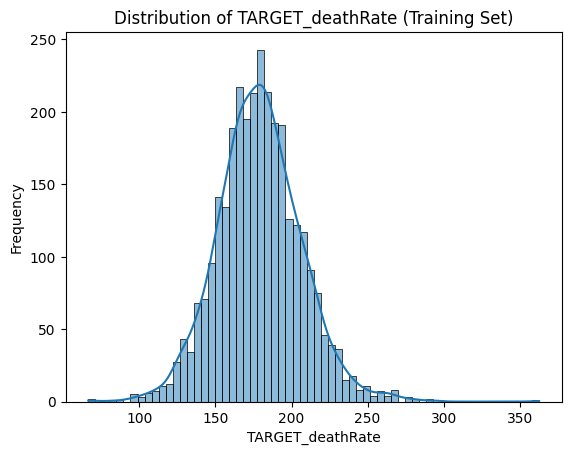

In [15]:
# Distribution of target variable
sns.histplot(x="TARGET_deathRate", data=train_df, kde=True)
plt.title("Distribution of TARGET_deathRate (Training Set)")
plt.xlabel("TARGET_deathRate")
plt.ylabel("Frequency")
plt.show()

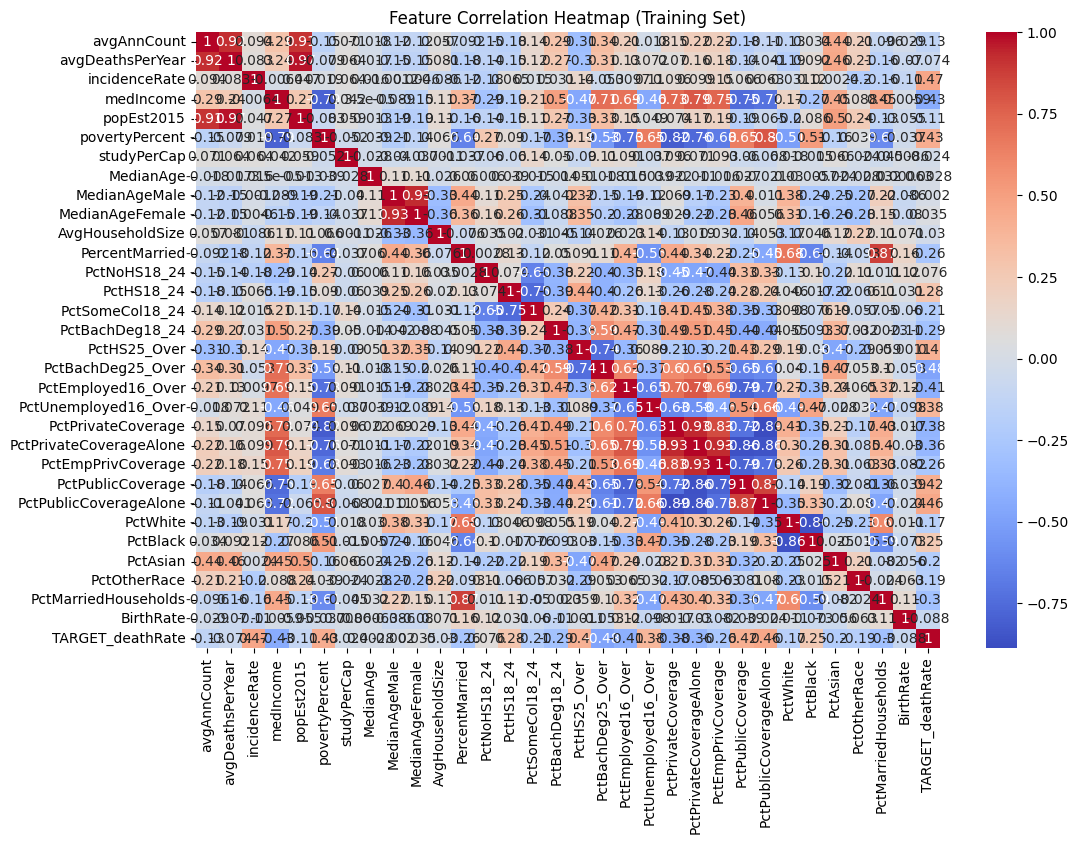

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
# Drop non-numeric columns before calculating correlation
numeric_train_df = train_df.drop(['binnedInc', 'Geography'], axis=1)
sns.heatmap(numeric_train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Training Set)")
plt.show()

In [18]:
# Install XGBoost (if not already installed)
!pip install xgboost

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [21]:
# Prepare data for XGBoost
# Separate features (X) and target (y)
X = train_df_cleaned.drop(['TARGET_deathRate', 'Geography', 'binnedInc'], axis=1) # Drop target and non-numeric columns
y = train_df_cleaned['TARGET_deathRate']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


# Train XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [23]:
# Prepare test data for prediction
# Drop non-numeric columns
X_test = test_df_cleaned.drop(['Geography', 'binnedInc'], axis=1)

# Handle missing values using the same imputer fitted on the training data
X_test_imputed = imputer.transform(X_test)

# Make Predictions
y_pred = model.predict(X_test_imputed)

print("Predictions made successfully.")

Predictions made successfully.


In [25]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

/tmp/ipython-input-2780113135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cleaned['predicted_deathRate'] = y_pred


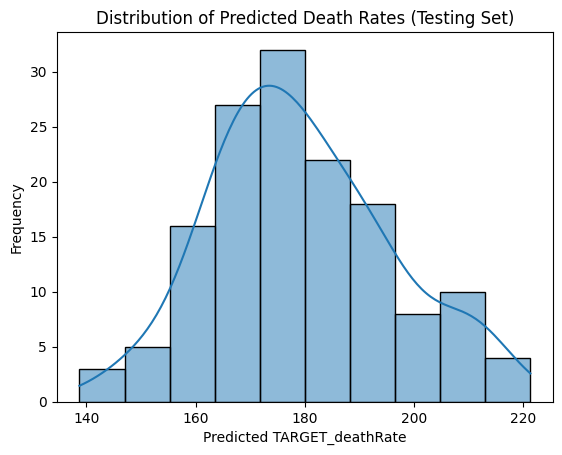

In [30]:
# Add predictions to the cleaned test DataFrame
test_df_cleaned['predicted_deathRate'] = y_pred

# Visualize the distribution of predictions
sns.histplot(x="predicted_deathRate", data=test_df_cleaned, kde=True)
plt.title("Distribution of Predicted Death Rates (Testing Set)")
plt.xlabel("Predicted TARGET_deathRate")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print("\n📊 Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
RMSE: 15.61
MAE: 9.51
R² Score: 0.67


<Figure size 1000x600 with 0 Axes>

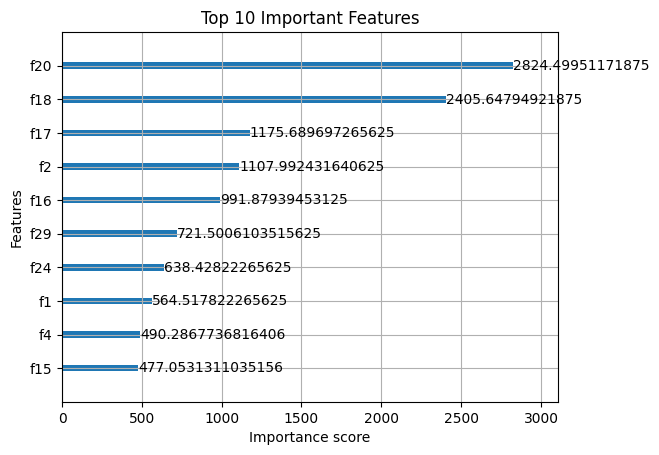

In [28]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()



# The feature importance plot you see is generated by the XGBoost model after training. It shows the relative importance of each feature in predicting the target variable (TARGET_deathRate).

Here's how to interpret it:

    Bars: Each bar represents a feature from your dataset.
    Length of the bars: The longer the bar, the more important that feature was in the model's predictions. The importance is typically measured by how much each feature contributes to the model's performance (in this case, measured by 'gain', which is the improvement in accuracy brought by a feature to the branches where it's used).
    Feature Names: The names on the y-axis indicate the features. The plot is showing the top 10 most important features based on the 'gain' metric.

This plot helps you understand which factors have the biggest impact on the death rate according to your model. Features with higher importance scores are more influential in the prediction process.
